In [3]:
import sys
print(sys.version)

2.7.12 |Anaconda 4.1.1 (x86_64)| (default, Jul  2 2016, 17:43:17) 
[GCC 4.2.1 (Based on Apple Inc. build 5658) (LLVM build 2336.11.00)]


In [4]:
import sklearn
sklearn.__version__

'0.18'

In [5]:
import numpy as np
from sklearn.datasets import load_breast_cancer

In [6]:
data = load_breast_cancer()

In [7]:
X = data.data
X.shape # an array of each dimension (number of rows, number of columns)

(569, 30)

In [8]:
noise = np.random.randn(X.shape[0],X.shape[0]) # artificially add some noise 569*569

In [9]:
X = np.hstack([X,noise]) # adding noise as features, to make the problem harder to solve

In [10]:
Y = data.target #label

In [11]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [12]:
# please try out different C values
lr = LR(C=1.0) # create a model, set the parameters (hyperparameter)
lr.fit(X_train, Y_train) # train the model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
lr.score(X_test, Y_test) # prediction performance, accuracy

0.90909090909090906

In [14]:
from sklearn.metrics import precision_score,recall_score

In [15]:
precision = precision_score(Y_test, lr.predict(X_test),pos_label=1)
recall = recall_score(Y_test, lr.predict(X_test),pos_label=1)
print(precision)
print(recall)

0.916666666667
0.94623655914


In [16]:
lr.classes_

array([0, 1])

In [17]:
# TPR = TP/P
# FPR = FP/N
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, lr.predict_proba(X_test)[:,1],pos_label=1)

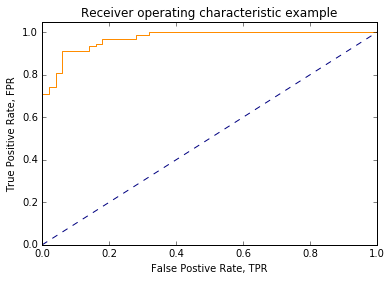

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Postive Rate, FPR')
plt.ylabel('True Positive Rate, TPR')
plt.title('Receiver operating characteristic example')
plt.show()